In [49]:
from astropy.table import Table
import astropy.cosmology as apc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data = Table.read("../sdss_dr15/skyserver_results.fits")
print('number of QSO', len(data[data['class']=='QSO']))
print('number of GALAXY', len(data[data['class']=='GALAXY']))
ii_qso = data['class']=='QSO'
ii_gal = data['class']=='GALAXY'
ii_spatial_mask = (data['ra']>135) & (data['ra']<225) & (data['dec']>0) & (data['dec']<45) 
gal_data = data[ii_gal]

number of QSO 30387
number of GALAXY 191681


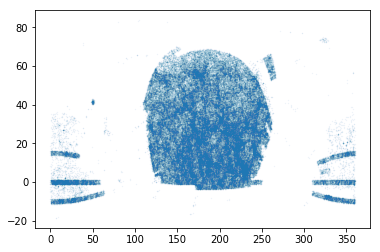

In [38]:
plt.scatter(gal_data['ra'], gal_data['dec'], alpha=0.1, s=0.1)

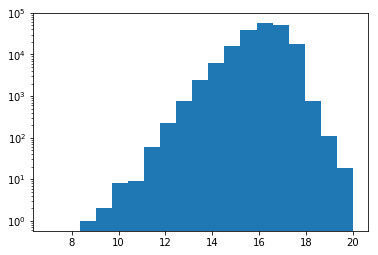

In [41]:
_ = plt.hist(gal_data['r'], bins=np.linspace(7,20,20), log=True)

111


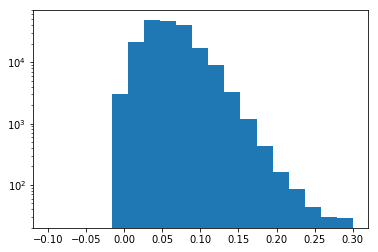

In [48]:
_ = plt.hist(gal_data['redshift'], bins=np.linspace(-0.1,0.3,20), log=True)
print(np.count_nonzero(gal_data['redshift']<0.0))

In [87]:
# redefining coordinates
planck15 = apc.Planck15

gal_data['theta'] = np.deg2rad(90-gal_data['dec'])
gal_data['phi'] = np.deg2rad((gal_data['ra'] - (90+45))%360.0)
gal_data['r_comoving'] = planck15.comoving_distance(gal_data['redshift'])
gal_data['z_coord'] = gal_data['r_comoving'] * np.cos(gal_data['theta'])
gal_data['y_coord'] = gal_data['r_comoving'] * np.sin(gal_data['theta']) * np.sin(gal_data['phi'])
gal_data['x_coord'] = gal_data['r_comoving'] * np.sin(gal_data['theta']) * np.cos(gal_data['phi'])

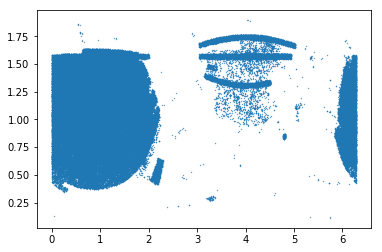

In [88]:
plt.scatter(gal_data['phi'], gal_data['theta'], s=0.1)

In [89]:
ii_mask = (gal_data['theta'] < np.pi/2)  
ii_mask &= (gal_data['theta']>np.pi/4) 
ii_mask &= (gal_data['phi']>0.0) 
ii_mask &= (gal_data['phi']<np.pi/2.0) 
ii_mask &= (gal_data['r_comoving']>0.0)
ii_mask &= (gal_data['r_comoving']<300.0)
gal_data_mask = gal_data[ii_mask]

Text(0,0.5,'z')

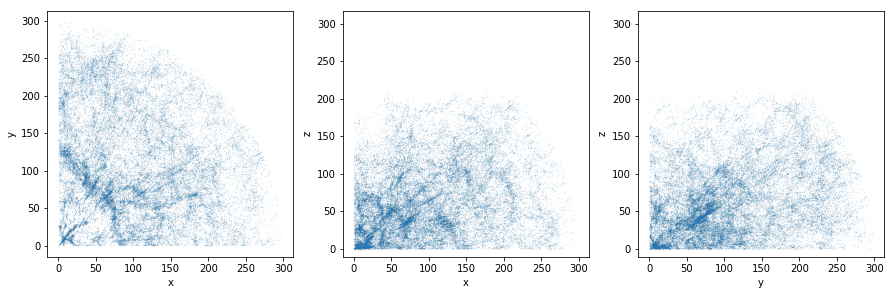

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
_ = plt.scatter(gal_data_mask['x_coord'], gal_data_mask['y_coord'], s=0.001)
plt.axis('square')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,3,2)
_ = plt.scatter(gal_data_mask['x_coord'], gal_data_mask['z_coord'], s=0.001)
plt.axis('square')
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(1,3,3)
_ = plt.scatter(gal_data_mask['y_coord'], gal_data_mask['z_coord'], s=0.001)
plt.axis('square')
plt.xlabel('y')
plt.ylabel('z')